In [1]:
import bitis as bt

# Load the dataset
df = bt.datasets.tissue_dataset()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Tissue Matrix          56 non-null     object 
 1   Density                56 non-null     float64
 2   Elongation             56 non-null     float64
 3   Orientation            56 non-null     float64
 4   Compactness            56 non-null     float64
 5   Structural_anisotropy  56 non-null     float64
 6   Complexity             56 non-null     float64
 7   Tissue size            56 non-null     object 
dtypes: float64(6), object(2)
memory usage: 3.6+ KB


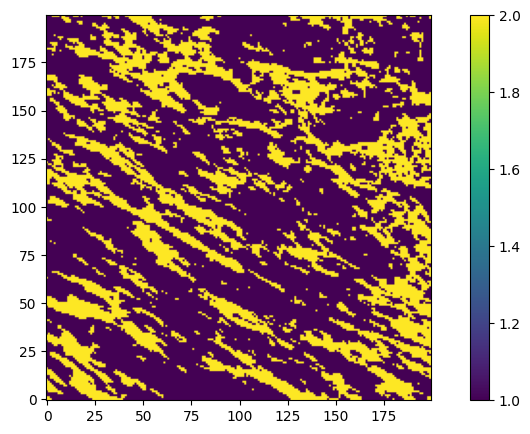

In [2]:
import numpy as np
import matplotlib.pyplot as plt


# Filter the dataset to extract one specific texture that meets the criteria:
filtered_df = df[(df['Density'].between(0.3, 0.35)) &
                 (df['Elongation'] > 2.5)]

# Select the first texture that meets the criteria
texture = filtered_df["Tissue Matrix"].iloc[0]

# Convert the texture to a matrix with values 1 and 2 and float32 type
training_tex = np.where(texture == 0, 1, 2).astype(np.float32)

plt.figure(figsize=(10, 5))
plt.imshow(training_tex, cmap='viridis', origin='lower')
plt.colorbar()
plt.show()


## Calculate the metrics for texture

In [4]:
import bitis as bt


texture_clusters_property = bt.TextureClustersProperty(training_tex,
                                                       threshold=1.5)
density = texture_clusters_property.calc_density()
solidity = texture_clusters_property.calc_solidity(min_area=5)
compactness = texture_clusters_property.calc_compactness(quant=0.75)
structural_anisotropy = texture_clusters_property.calc_structural_anisotropy()

print(density, solidity, compactness, structural_anisotropy)


0.314675 0.7614646854798406 1.0 (5.566880568531927, 2.076258365849454)
